In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-pipeline-2024/STR Global Data - Hotel Pipeline 2024.csv


# Exploratory Data Analysis(EDA) on Hotel Pipeline 2024
Given my background as a B2B manager at Samsung, a major part of my job was focused on selling hotel TVs and digital signage screens to hotels across East and Central Africa. My interest in transitioning to data science allows me to use my transferable skills from my B2B life so as to see how Data Science can benefit the hospitality industry. Choosing the "STR Global Data - Hotel Pipeline 2024" dataset is an excellent choice dataset to explore. This dataset, which details hotel projects across various regions, aligns well with my domain expertise and can help in creating a compelling portfolio project. Below is a step-by-step guide on how I chose to performing Exploratory Data Analysis (EDA) on this dataset, which is tailored to highlight my data science skills while leveraging on my hospitality industry knowledge and experience.


## Thought Process for EDA
EDA is about understanding the dataset, uncovering patterns, identifying anomalies, and generating insights that could inform business decisions or further analysis. My goal is to demonstrate proficiency in data manipulation, visualization, statistical analysis, and domain-specific insights relevant to the hospitality industry. Here’s a structured approach:

### Understand the Dataset and Define Objectives
 -  Objective: My aim to answer questions relevant to the hospitality industry, such as identifying trends in hotel development, assessing project viability, or understanding market dynamics in Africa and the Middle East. My prior experience plays a big role in guiding me to focus on aspects like meeting room facilities, project scales, or chain affiliations, which tie into my experience in selling TVs and signage for hotels.
 - Dataset Overview: The dataset includes columns like Project ID, Project Name, City, Country, Room Count, Projected Opening Date, Project Phase, Affiliation Name, Chain Scale, Management Company, Owner Company, Project Value, and amenities like Pool, Restaurant, and Meeting Space. This rich dataset allows for both numerical and categorical analyses, as well as geospatial and temporal insights.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
df = pd.read_csv('/kaggle/input/hotel-pipeline-2024/STR Global Data - Hotel Pipeline 2024.csv')

### Inspect Structure:
 - Check the first few rows with **df.head()** to understand the data.
 - Examine column names and data types with **df.info()** to identify numeric (e.g., Room Count, Project Value) and categorical (e.g., Country, Chain Scale) variables.
 - Check for missing values with **df.isnull().sum()** to assess data completeness.



In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Project ID,Project Name,Address,City,State,Country,Postal Code,Market,Tract,Room Count,...,Total Meeting Space Sq Ft,Project Area (1000 sq. ft),Project Value (millions$),Data Source,Executed Date,Date Created,Future STR Number,Latitude,Longitude,Property Hotel ID
0,13429,Hard Rock Abu Dhabi,Festival Blvd Zone 8A,Abu Dhabi,ZZ,United Arab Emirates,126961,Abu Dhabi,Corniche & Downtown,378,...,NaN,283.50,NaN,Costar Research,NaN,12/01/2008,294339.0,24.503017,54.372490,1228849
1,16395,Hilton Riyadh King Saud University,King Khaled Bin Abdul Aziz Road Rd,Riyadh,ZZ,Saudi Arabia,12371,Saudi Arabia,Riyadh,241,...,NaN,97.91,NaN,Hospitality Feed,NaN,07/01/2010,300392.0,24.708051,46.621446,1046477
2,16689,InterContinental Dakar,Les Deux Mamelles,Dakar,NaN,Senegal,NaN,Senegal,Senegal,201,...,NaN,97.36,NaN,Hospitality Feed,06/09/2008,07/01/2008,283834.0,14.721126,-17.499653,1184162
3,18857,Hilton Freetown Cape Sierra,Cape Road Aberdeen Rd,Freetown,NaN,Sierra Leone,47235,Sierra Leone,Sierra Leone,200,...,NaN,150.70,NaN,Hospitality Feed,08/12/2011,08/01/2011,283031.0,8.493333,-13.289921,1046505
4,20203,Protea Hotel Fire & Ice Gaborone,Gaborone West Extension,Gaborone,NaN,Botswana,NaN,Botswana,Gaborone,160,...,NaN,65.00,NaN,Hospitality Feed,04/01/2016,12/01/2008,NaN,-24.652461,25.926103,1049031


In [5]:
df.shape

(1384, 87)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   1384 non-null   int64  
 1   Project Name                 1384 non-null   object 
 2   Address                      1384 non-null   object 
 3   City                         1384 non-null   object 
 4   State                        732 non-null    object 
 5   Country                      1384 non-null   object 
 6   Postal Code                  503 non-null    object 
 7   Market                       1384 non-null   object 
 8   Tract                        1384 non-null   object 
 9   Room Count                   1384 non-null   int64  
 10  Condotel Room Count          0 non-null      float64
 11  Non-Rental Residences        0 non-null      float64
 12  Timeshare Units              0 non-null      float64
 13  Projected Opening 

In [7]:
df.isnull().sum()

Project ID             0
Project Name           0
Address                0
City                   0
State                652
                    ... 
Date Created           0
Future STR Number    751
Latitude               0
Longitude              0
Property Hotel ID      0
Length: 87, dtype: int64

In [8]:
df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Project ID,Room Count,Condotel Room Count,Non-Rental Residences,Timeshare Units,Affiliation Code,Date Entered Pre-Planning,Management Phone,Owner Phone,Developer Phone,Architect Phone,Number of Meeting Rooms,Largest Meeting Room Sq Ft,Total Meeting Space Sq Ft,Project Area (1000 sq. ft),Project Value (millions$),Future STR Number,Latitude,Longitude,Property Hotel ID
count,1.384000e+03,1384.000000,0.0,0.0,0.0,1.384000e+03,0.0,8.130000e+02,2.530000e+02,1.310000e+02,1.790000e+02,66.000000,58.000000,58.000000,1363.000000,0.0,633.000000,1384.000000,1384.000000,1.384000e+03
mean,4.864369e+06,231.926301,NaN,NaN,NaN,1.821329e+05,NaN,4.208048e+09,2.632177e+09,1.351526e+09,4.854484e+09,4.469697,9466.041931,12359.932172,152.699633,NaN,291966.148499,19.424057,36.291186,1.332710e+06
std,5.073128e+06,342.135386,NaN,NaN,NaN,1.335530e+06,NaN,2.135718e+10,1.384278e+10,8.600806e+09,3.269481e+10,2.724361,21693.243309,22440.547574,479.810485,NaN,21646.612962,13.757410,19.447866,3.262729e+05
min,1.342900e+04,0.000000,NaN,NaN,NaN,6.000000e+00,NaN,9.740000e+02,2.300000e+02,9.740000e+02,9.660000e+02,1.000000,172.222000,279.861000,0.010000,NaN,111140.000000,-34.798023,-24.992356,1.041757e+06
25%,7.781175e+04,120.000000,NaN,NaN,NaN,6.700000e+02,NaN,1.453886e+08,4.334000e+07,4.288912e+07,4.329229e+07,2.000000,1143.372000,2502.609000,55.760000,NaN,290364.000000,17.000019,31.295495,1.126581e+06
50%,1.078525e+05,180.000000,NaN,NaN,NaN,1.152000e+03,NaN,2.261372e+09,1.144522e+08,1.126579e+08,1.177916e+08,4.000000,3896.535000,6151.574000,96.880000,NaN,294896.000000,24.763958,39.532850,1.229859e+06
75%,1.023514e+07,252.000000,NaN,NaN,NaN,2.000000e+03,NaN,4.168743e+09,5.553096e+08,5.073029e+08,2.077380e+09,7.000000,7991.323250,11504.183250,150.700000,NaN,300007.000000,26.217443,51.356713,1.253149e+06
max,1.032732e+07,9000.000000,NaN,NaN,NaN,1.620987e+07,NaN,4.903077e+11,1.165671e+11,9.714390e+10,3.108843e+11,12.000000,156410.382000,156410.382000,12916.690000,NaN,311848.000000,36.925601,59.766793,2.008060e+06


In [9]:
df.columns

Index(['Project ID', 'Project Name', 'Address', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Tract', 'Room Count', 'Condotel Room Count',
       'Non-Rental Residences', 'Timeshare Units', 'Projected Opening Date',
       'Project Phase', 'Affiliation Code', 'Affiliation Name', 'Chain Scale',
       'Project Overview', 'Date Entered Pre-Planning',
       'Date Entered Planning', 'Date Entered Final Planning',
       'Date Entered Construction', 'Date Entered Deferred',
       'Date Entered Abandoned', 'Management Company Name',
       'Management Contact Name', 'Management Address 1',
       'Management Address 2', 'Management City', 'Management State',
       'Management Country', 'Management Postal Code', 'Management Phone',
       'Management Email', 'Management Website', 'Owner Company Name',
       'Owner Contact Name', 'Owner Address 1', 'Owner Address 2',
       'Owner City', 'Owner State', 'Owner Country', 'Owner Postal Code',
       'Owner Phone', 'Owner Email'

### Data Cleaning
 - **Handle Missing Values**:
    - Columns like Room Count, Projected Opening Date, and Project Phase are
      critical. If missing, consider imputing (e.g., median for numerical
      columns) or excluding rows or columns for key analyses.
    - For categorical columns like Management Company Name or Owner Company
      Name, replace missing values with "Unknown" or analyze patterns
      in missingness (e.g., are smaller projects more likely to lack owner
      details?).

In [10]:
# I have chosen to reduce the number of columns so as to remain with the relevant columns with the information we need

df = df[['Project Name', 'Address', 'City', 
         #'State', 
         'Country',
         #'Postal Code', 'Market', 'Tract','Project ID'
         'Room Count', #'Condotel Room Count','Non-Rental Residences', 'Timeshare Units', 
         'Projected Opening Date',
         'Project Phase', #'Affiliation Code', 
         'Affiliation Name', 'Chain Scale',
         #'Project Overview', 'Date Entered Pre-Planning',
         #'Date Entered Planning', 'Date Entered Final Planning','Date Entered Construction', 'Date Entered Deferred','Date Entered Abandoned', 
         #'Management Company Name','Management Contact Name', 'Management Address 1',Management Address 2', 'Management City', 'Management State',
         #'Management Country', 'Management Postal Code', 'Management Phone','Management Email', 'Management Website', 
         #Owner Company Name','Owner Contact Name', 'Owner Address 1', 'Owner Address 2','Owner City', 'Owner State', 
         #Owner Country','Owner Postal Code','Owner Phone', 'Owner Email', 'Owner Website', 
         #Developer Company Name','Developer Contact Name', 'Developer Address 1', 'Developer Address 2','Developer City', 'Developer State', Developer Country',
         #'Developer Postal Code', 'Developer Phone', 'Developer Email','Developer Website', 
         #'Architect Company Name','Architect Contact Name','Architect Address1', 'Architect Address 2', 'Architect City','Architect State', 
         #Architect Country','Architect Postal Code','Architect Phone', 'Architect Email', 'Architect Website','Parent Company Name','Property Hotel ID' 
         'Condotel (Y/N)', 'Pool (Y/N)','Restaurant (Y/N)', 'Business Center (Y/N)', 'Meeting Space (Y/N)',
         #Number of Meeting Rooms', 'Largest Meeting Room Sq Ft',Total Meeting Space Sq Ft', 
         'Project Area (1000 sq. ft)',
         #'Project Value (millions$)', 
         'Data Source', 
         #'Executed Date',
         'Date Created', 
         #'Future STR Number', 
         'Latitude', 'Longitude',]].copy()

In [11]:
df.columns

Index(['Project Name', 'Address', 'City', 'Country', 'Room Count',
       'Projected Opening Date', 'Project Phase', 'Affiliation Name',
       'Chain Scale', 'Condotel (Y/N)', 'Pool (Y/N)', 'Restaurant (Y/N)',
       'Business Center (Y/N)', 'Meeting Space (Y/N)',
       'Project Area (1000 sq. ft)', 'Data Source', 'Date Created', 'Latitude',
       'Longitude'],
      dtype='object')

In [12]:
df.describe()

,Room Count,Project Area (1000 sq. ft),Latitude,Longitude
count,1384.000000,1363.000000,1384.000000,1384.000000
mean,231.926301,152.699633,19.424057,36.291186
std,342.135386,479.810485,13.757410,19.447866
min,0.000000,0.010000,-34.798023,-24.992356
25%,120.000000,55.760000,17.000019,31.295495
50%,180.000000,96.880000,24.763958,39.532850
75%,252.000000,150.700000,26.217443,51.356713
max,9000.000000,12916.690000,36.925601,59.766793


In [13]:
df.shape

(1384, 19)

In [14]:
df.isna().sum()

Project Name                    0
Address                         0
City                            0
Country                         0
Room Count                      0
Projected Opening Date        315
Project Phase                   0
Affiliation Name                0
Chain Scale                     0
Condotel (Y/N)                  0
Pool (Y/N)                      0
Restaurant (Y/N)                0
Business Center (Y/N)           0
Meeting Space (Y/N)             0
Project Area (1000 sq. ft)     21
Data Source                     0
Date Created                    0
Latitude                        0
Longitude                       0
dtype: int64

### Standardize Data:
 - Convert Projected Opening Date to a datetime format using **pd.to_datetime(df['Projected Opening Date'], errors='coerce')** to enable temporal analysis.
 - Check for inconsistencies in categorical columns (e.g., Country or Chain Scale). For example, ensure "United Arab Emirates" isn’t listed as "UAE" elsewhere.
 - Handle anomalies in numerical columns (e.g., negative or extremely high Room Count or Project Value).

In [15]:
# Converting Projected Opening Date to DateTime Format
pd.to_datetime(df['Projected Opening Date'], errors='coerce')

0      2023-10-01
1      2025-02-18
2      2030-12-31
3      2026-04-01
4      2025-06-01
          ...    
1379   2025-02-01
1380   2028-05-01
1381   2027-09-30
1382   2027-07-01
1383   2027-01-01
Name: Projected Opening Date, Length: 1384, dtype: datetime64[ns]

In [16]:
df.dtypes

Project Name                   object
Address                        object
City                           object
Country                        object
Room Count                      int64
Projected Opening Date         object
Project Phase                  object
Affiliation Name               object
Chain Scale                    object
Condotel (Y/N)                 object
Pool (Y/N)                     object
Restaurant (Y/N)               object
Business Center (Y/N)          object
Meeting Space (Y/N)            object
Project Area (1000 sq. ft)    float64
Data Source                    object
Date Created                   object
Latitude                      float64
Longitude                     float64
dtype: object

In [17]:
# Convert Project Opening Date to DateTime format
df['Projected Opening Date'] = pd.to_datetime(df['Projected Opening Date'])

In [18]:
df.dtypes

Project Name                          object
Address                               object
City                                  object
Country                               object
Room Count                             int64
Projected Opening Date        datetime64[ns]
Project Phase                         object
Affiliation Name                      object
Chain Scale                           object
Condotel (Y/N)                        object
Pool (Y/N)                            object
Restaurant (Y/N)                      object
Business Center (Y/N)                 object
Meeting Space (Y/N)                   object
Project Area (1000 sq. ft)           float64
Data Source                           object
Date Created                          object
Latitude                             float64
Longitude                            float64
dtype: object

In [19]:
# Inspecting unique values in 'Country'and 'Chain Scale'

#For Country, check if similar names appear (e.g., "United Arab Emirates" and "UAE").
print("Unique Countries:")
print(df['Country'].unique())

#For Chain Scale, check for variations like "Luxury" vs. "Luxury Chain" or case differences.
print("\nUnique Chain Scales:")
print(df['Chain Scale'].unique())

Unique Countries:
['United Arab Emirates' 'Saudi Arabia' 'Senegal' 'Sierra Leone' 'Botswana'
 'Egypt' 'Nigeria' 'Qatar' 'Morocco' 'Cape Verde' 'Algeria' 'Iraq'
 'Ethiopia' 'Jordan' 'Syrian Arab Republic (Syria)' 'Oman' 'Madagascar'
 'Tunisia' 'Mauritius' 'Mauritania' 'Kenya' 'Bahrain'
 'Congo (Brazzaville)' 'Kuwait' 'Ghana' 'Angola' 'Uganda' 'Réunion'
 'South Africa' 'Iran' 'Benin' "Côte d'Ivoire"
 'United Republic of Tanzania' 'Niger' 'Malawi' 'Zambia' 'Mozambique'
 'Cameroon' 'Liberia' 'Zimbabwe' 'Democratic Republic of the Congo'
 'Rwanda' 'Djibouti' 'Guinea' 'Seychelles' 'Equatorial Guinea' 'Gabon'
 'Chad' 'Somalia' 'Togo' 'Sudan' 'Namibia' 'Lebanon' 'The Gambia' 'Libya']

Unique Chain Scales:
['Upper Upscale Chain' 'Luxury Chain' 'Upper Midscale Chain'
 'Upscale Chain' 'Independent' 'Midscale Chain' 'Economy Chain']


**Result :**
There seems to be no unique values in 'Country' and 'Chain Scale' columns.

### Standardize String Formats
To handle case differences, extra spaces, or punctuation, standardize the text in Country and Chain Scale.

In [20]:
# Convert to lowercase and strip/remove whitespace
df['Country'] = df['Country'].str.lower().str.strip()
df['Chain Scale'] = df['Chain Scale'].str.lower().str.strip()

#Re-check unique values
print("Unique Countries (after standardization):")
print(df['Country'].unique())
print("\nUnique Chain Scales(after standardization):")
print(df['Chain Scale'].unique())

Unique Countries (after standardization):
['united arab emirates' 'saudi arabia' 'senegal' 'sierra leone' 'botswana'
 'egypt' 'nigeria' 'qatar' 'morocco' 'cape verde' 'algeria' 'iraq'
 'ethiopia' 'jordan' 'syrian arab republic (syria)' 'oman' 'madagascar'
 'tunisia' 'mauritius' 'mauritania' 'kenya' 'bahrain'
 'congo (brazzaville)' 'kuwait' 'ghana' 'angola' 'uganda' 'réunion'
 'south africa' 'iran' 'benin' "côte d'ivoire"
 'united republic of tanzania' 'niger' 'malawi' 'zambia' 'mozambique'
 'cameroon' 'liberia' 'zimbabwe' 'democratic republic of the congo'
 'rwanda' 'djibouti' 'guinea' 'seychelles' 'equatorial guinea' 'gabon'
 'chad' 'somalia' 'togo' 'sudan' 'namibia' 'lebanon' 'the gambia' 'libya']

Unique Chain Scales(after standardization):
['upper upscale chain' 'luxury chain' 'upper midscale chain'
 'upscale chain' 'independent' 'midscale chain' 'economy chain']


**Purpose :** 
 - Converts "EGYPT" to "egypt" and removes trailing spaces (e.g., "Saudi Arabia " to "saudi arabia").
 - Ensures consistent formatting before further analysis.
 

In [21]:
# Add New Columns for DataTime

df['Expected Opening Year'] = df['Projected Opening Date'].dt.strftime('%Y') #New column for Year
df['Expected Opening Month'] = df['Projected Opening Date'].dt.strftime('%Y - %b') #New column for Month
df['Expected Opening Quarter'] = df['Projected Opening Date'].dt.to_period('Q').dt.strftime('%Y - Q%q') #New column for Quarter

In [22]:
df.head()

,Project Name,Address,City,Country,Room Count,Projected Opening Date,Project Phase,Affiliation Name,Chain Scale,Condotel (Y/N),...,Business Center (Y/N),Meeting Space (Y/N),Project Area (1000 sq. ft),Data Source,Date Created,Latitude,Longitude,Expected Opening Year,Expected Opening Month,Expected Opening Quarter
0,Hard Rock Abu Dhabi,Festival Blvd Zone 8A,Abu Dhabi,united arab emirates,378,2023-10-01,Abandoned,Hard Rock,upper upscale chain,N,...,Y,Y,283.50,Costar Research,12/01/2008,24.503017,54.372490,2023,2023 - Oct,2023 - Q4
1,Hilton Riyadh King Saud University,King Khaled Bin Abdul Aziz Road Rd,Riyadh,saudi arabia,241,2025-02-18,In Construction,Hilton,upper upscale chain,N,...,N,Y,97.91,Hospitality Feed,07/01/2010,24.708051,46.621446,2025,2025 - Feb,2025 - Q1
2,InterContinental Dakar,Les Deux Mamelles,Dakar,senegal,201,2030-12-31,In Construction,InterContinental,luxury chain,N,...,N,Y,97.36,Hospitality Feed,07/01/2008,14.721126,-17.499653,2030,2030 - Dec,2030 - Q4
3,Hilton Freetown Cape Sierra,Cape Road Aberdeen Rd,Freetown,sierra leone,200,2026-04-01,In Construction,Hilton,upper upscale chain,N,...,Y,Y,150.70,Hospitality Feed,08/01/2011,8.493333,-13.289921,2026,2026 - Apr,2026 - Q2
4,Protea Hotel Fire & Ice Gaborone,Gaborone West Extension,Gaborone,botswana,160,2025-06-01,Planning,Protea Hotel,upper midscale chain,N,...,N,N,65.00,Hospitality Feed,12/01/2008,-24.652461,25.926103,2025,2025 - Jun,2025 - Q2


## Domain-Specific Cleaning:
 - Given my focus is on Africa, filter for African countries (e.g., Senegal, Nigeria, Egypt) and check for the number of projects in each country.
 - Check amenities like Meeting Space (Y/N) or Number of Meeting Rooms, as these relate to your experience with digital signage and meeting room solutions.

In [23]:
# Define a list for African Countries

african_countries = [
    'algeria',
    'angola',
    'benin',
    'botswana',
    'burkina faso',
    'burundi',
    'cape verde',
    'cameroon',
    'central african republic',
    'chad',
    'comoros',
    'congo',  # For Republic of the Congo
    'democratic republic of the congo',
    'djibouti',
    'egypt',
    'equatorial guinea',
    'eritrea',
    'eswatini',
    'ethiopia',
    'gabon',
    'gambia',
    'ghana',
    'guinea',
    'guinea-bissau',
    'ivory coast',  # Preferred over 'Côte d'Ivoire' for simplicity
    'kenya',
    'lesotho',
    'liberia',
    'libya',
    'madagascar',
    'malawi',
    'mali',
    'mauritania',
    'mauritius',
    'morocco',
    'mozambique',
    'namibia',
    'niger',
    'nigeria',
    'rwanda',
    'sao tome and principe',
    'senegal',
    'seychelles',
    'sierra leone',
    'somalia',
    'south africa',
    'south sudan',
    'sudan',
    'united republic of tanzania',
    'togo',
    'tunisia',
    'uganda',
    'zambia',
    'zimbabwe'
]
#Filter for African Countries
df_africa = df[df['Country'].isin(african_countries)]

#Check for number of projects per African Country
print("Number of Projects by African Country:")
print(df_africa['Country'].value_counts())

Number of Projects by African Country:
Country
egypt                               128
morocco                              53
ethiopia                             45
nigeria                              44
south africa                         27
kenya                                27
ghana                                17
united republic of tanzania          16
algeria                              16
senegal                              14
cape verde                           14
cameroon                             13
mauritius                            12
uganda                               10
tunisia                               9
zambia                                9
angola                                7
democratic republic of the congo      7
botswana                              6
mozambique                            6
djibouti                              6
rwanda                                6
zimbabwe                              6
benin                            

### Clean and Validate Amenities Data
Focus on **Meeting Space (Y/N)** and **Number of Meeting Rooms**, as these relate to my experience with digital signage and meeting room solutions.


In [24]:
df_africa

,Project Name,Address,City,Country,Room Count,Projected Opening Date,Project Phase,Affiliation Name,Chain Scale,Condotel (Y/N),...,Business Center (Y/N),Meeting Space (Y/N),Project Area (1000 sq. ft),Data Source,Date Created,Latitude,Longitude,Expected Opening Year,Expected Opening Month,Expected Opening Quarter
2,InterContinental Dakar,Les Deux Mamelles,Dakar,senegal,201,2030-12-31,In Construction,InterContinental,luxury chain,N,...,N,Y,97.36,Hospitality Feed,07/01/2008,14.721126,-17.499653,2030,2030 - Dec,2030 - Q4
3,Hilton Freetown Cape Sierra,Cape Road Aberdeen Rd,Freetown,sierra leone,200,2026-04-01,In Construction,Hilton,upper upscale chain,N,...,Y,Y,150.70,Hospitality Feed,08/01/2011,8.493333,-13.289921,2026,2026 - Apr,2026 - Q2
4,Protea Hotel Fire & Ice Gaborone,Gaborone West Extension,Gaborone,botswana,160,2025-06-01,Planning,Protea Hotel,upper midscale chain,N,...,N,N,65.00,Hospitality Feed,12/01/2008,-24.652461,25.926103,2025,2025 - Jun,2025 - Q2
5,The Ritz-Carlton Hotel & Residences Palm Hills...,Al Gabalayah,Giza,egypt,150,2028-03-01,Planning,Ritz-Carlton,luxury chain,N,...,Y,Y,150.70,Costar Research,01/13/2012,30.057712,31.218944,2028,2028 - Mar,2028 - Q1
7,Radisson Blu Hotel Abuja CBD,Unknown Address,Abuja,nigeria,104,2025-03-10,In Construction,Radisson Blu,upper upscale chain,N,...,N,Y,78.36,Costar Research,08/01/2009,9.055207,7.489868,2025,2025 - Mar,2025 - Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,Delta by Marriott Antananarivo,Rue Ampanjaka Toera,Antananarivo,madagascar,106,2025-02-28,Planning,Delta Hotel,upscale chain,N,...,N,Y,51.34,Costar Research,03/26/2024,-18.900342,47.520881,2025,2025 - Feb,2025 - Q1
1376,Crown Plaza Oran,Hai El Ghoualem,Oran,algeria,157,2025-03-15,Planning,Crowne Plaza,upscale chain,N,...,N,N,76.05,Costar Research,04/03/2024,35.688031,-0.643127,2025,2025 - Mar,2025 - Q1
1377,Hotel Royal Maxim Port Said Vignette Collection,15 September Street,Port Fouad,egypt,140,2028-03-15,Planning,Vignette Collection,luxury chain,N,...,N,Y,10.76,Costar Research,04/03/2024,31.248984,32.315268,2028,2028 - Mar,2028 - Q1
1379,Pyramid Continental Hotel Lusaka,Thabo Mbeki Rd,Lusaka,zambia,212,2025-02-01,In Construction,Independent,independent,N,...,N,N,102.69,Costar Research,04/04/2024,-15.398895,28.322196,2025,2025 - Feb,2025 - Q1


In [25]:
# Check for missing values in amenities columns
print("Missing values in Ammenities Columns:")
print(df_africa[['Meeting Space (Y/N)']].isnull().sum())

Missing values in Ammenities Columns:
Meeting Space (Y/N)    0
dtype: int64


In [26]:
# Let's check what is the size of the hotels in each country based on room count

africa_room_count = df_africa.groupby('Country')['Room Count'].value_counts()
africa_room_count

Country   Room Count
algeria   101           2
          54            1
          70            1
          120           1
          130           1
                       ..
zimbabwe  54            2
          99            1
          160           1
          180           1
          238           1
Name: count, Length: 424, dtype: int64

In [27]:
# Let's see the hotels based on room counts/size in Kenya
africa_room_count['kenya']

Room Count
120    3
20     2
100    2
105    2
150    2
200    2
4      1
57     1
75     1
80     1
125    1
146    1
168    1
189    1
240    1
246    1
250    1
255    1
346    1
960    1
Name: count, dtype: int64

In [28]:
# Total number of hotels in Kenya
africa_room_count['kenya'].sum()

27

We have basically created a small program to check the number of hotels based on room count in Africa.

In [29]:
total_africa_rooms = df_africa['Room Count'].sum()
total_africa_rooms

94193

## Analysis of Large African Hotels (200+ Rooms)

In [30]:
# Let's see the hotels that have a room count greater than or equal to 200
africa_rooms200 =df_africa[df_africa['Room Count']>=200]

#Display key columns
africa_rooms200[['Project Name','Country','City','Room Count','Meeting Space (Y/N)']]

,Project Name,Country,City,Room Count,Meeting Space (Y/N)
2,InterContinental Dakar,senegal,Dakar,201,Y
3,Hilton Freetown Cape Sierra,sierra leone,Freetown,200,Y
12,Melia White Sands Hotel & Spa,cape verde,Boa Vista,835,Y
14,Marriott Executive Apartments Algiers,algeria,Algiers,350,N
15,Hilton Port Harcourt Transcorp,nigeria,Port Harcourt,267,Y
...,...,...,...,...,...
1350,Wyndham Hotels and Resorts Moreen Bay,egypt,Marsa Alam,207,Y
1351,Catalonia Grand Zanzibar All suites and Spa,united republic of tanzania,Pwani Mchangani,272,N
1356,DoubleTree by Hilton Sharm El Sheikh - Sharks ...,egypt,Sharm El Sheikh,273,Y
1360,Melia Luanda,angola,Luanda,250,N


### Visualize and Summarize
Visualize the results to highlight trends in larger African hotels, tying into your digital signage and hotel TV expertise:



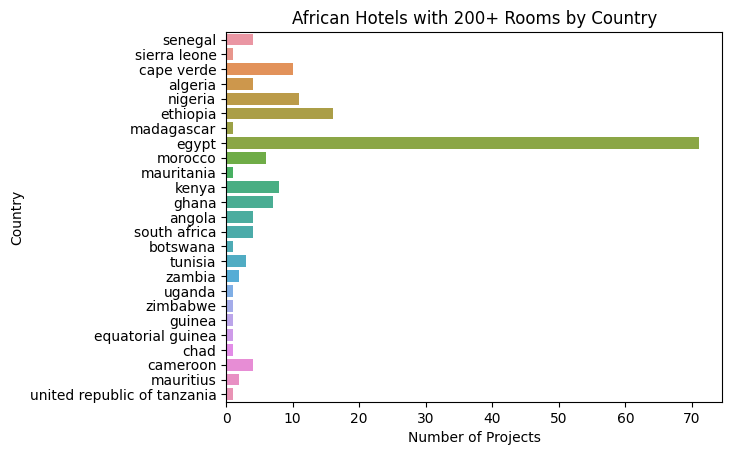

In [31]:
# Plot the number of large hotels by country
sns.countplot(data=africa_rooms200, y='Country')
plt.title('African Hotels with 200+ Rooms by Country')
plt.xlabel('Number of Projects')
plt.ylabel('Country')
plt.show()

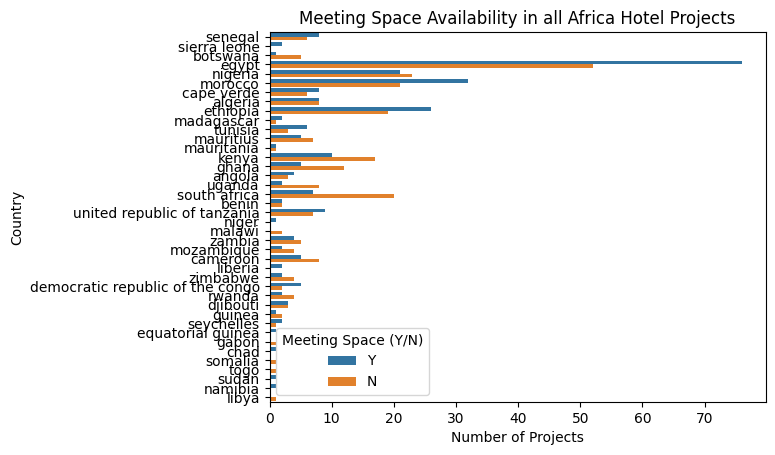

In [32]:
# Plot the propotion of all hotels with meeting spaces
sns.countplot(data=df_africa, y = 'Country', hue='Meeting Space (Y/N)')
plt.title('Meeting Space Availability in all Africa Hotel Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Country')
plt.show()

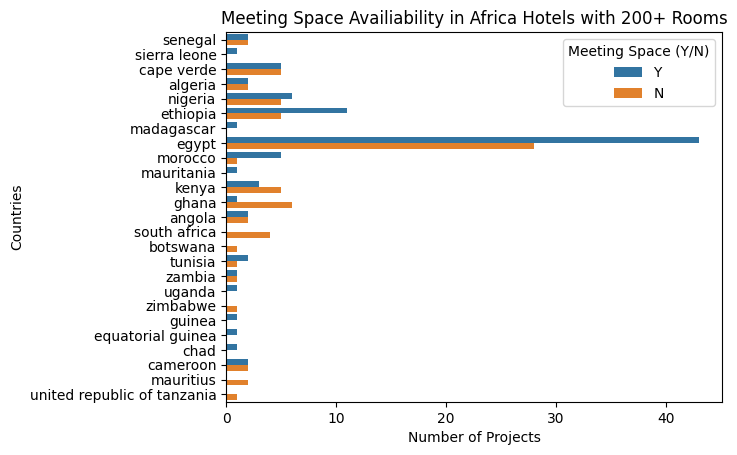

In [33]:
# Plot the propotion of large hotels with meeting spaces
sns.countplot(data=africa_rooms200, y='Country',hue='Meeting Space (Y/N)')
plt.title('Meeting Space Availiability in Africa Hotels with 200+ Rooms')
plt.xlabel('Number of Projects')
plt.ylabel('Countries')
plt.show()

In [34]:
# Summarize the meeting space prevalence
print("Percentage of large African Hotels with Meeting Spaces by Country:")
meeting_space_summary = africa_rooms200.groupby('Country')['Meeting Space (Y/N)'].value_counts(normalize=True).unstack().fillna(0)
print(meeting_space_summary['Y']*100)

Percentage of large African Hotels with Meeting Spaces by Country:
Country
algeria                         50.000000
angola                          50.000000
botswana                         0.000000
cameroon                        50.000000
cape verde                      50.000000
chad                           100.000000
egypt                           60.563380
equatorial guinea              100.000000
ethiopia                        68.750000
ghana                           14.285714
guinea                         100.000000
kenya                           37.500000
madagascar                     100.000000
mauritania                     100.000000
mauritius                        0.000000
morocco                         83.333333
nigeria                         54.545455
senegal                         50.000000
sierra leone                   100.000000
south africa                     0.000000
tunisia                         66.666667
uganda                         100.000000
u